In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 4

## Problem 1

The given empirical risk function can be rewritten in its matrix form

$$
\begin{alignat*}{2}
\hat{R}(\mathbf{\theta}) &= \frac{1}{n}(\mathbf{X} \mathbf{\theta} - \mathbf{y})^2 \\
&= \frac{1}{n} (\mathbf{X} \mathbf{\theta} - \mathbf{y})^{\top} (\mathbf{X} \mathbf{\theta} - \mathbf{y}) \\
&= \frac{1}{n} (\mathbf{\theta}^{\top} \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta} - 2 \mathbf{y}^{\top} \mathbf{X} \mathbf{\theta} + \mathbf{y}^{\top} \mathbf{y}) ,
\end{alignat*}
$$

we can compute the gradient of $\hat{R}$ as follows

$$
\triangledown \hat{R} (\mathbf{\theta}) = \frac{1}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta} - 2 \mathbf{y}^{\top} \mathbf{X}),
$$

for the optimal $\mathbf{\theta}$, denoted as $\mathbf{\theta}^*$, the gradient should be 0, thus we have

$$
\begin{equation}
2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^* = 2 \mathbf{y}^{\top} \mathbf{X}.
\end{equation}
$$

For gradient descent, we have the following equation

$$
\begin{alignat*}{2}
\mathbf{\theta}^{k+1} - \mathbf{\theta}^* &= \mathbf{\theta}^{k} - \alpha \triangledown \hat{R}(\mathbf{\theta}^{k}) - \mathbf{\theta}^* \\
&= \mathbf{\theta}^{k} - \frac{\alpha}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^{k} - 2 \mathbf{y}^{\top} \mathbf{X}) - \mathbf{\theta}^*.
\end{alignat*}
$$

According to eq. (1), we have:

$$
\begin{alignat*}{2}
\mathbf{\theta}^{k+1} - \mathbf{\theta}^* &= \mathbf{\theta}^{k} - \frac{\alpha}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^{k} - 2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^*) - \mathbf{\theta}^* \\
& = \left(\mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X}\right) \left( \mathbf{\theta}^{k} - \mathbf{\theta}^* \right),
\end{alignat*}
$$

so the following inequality holds:

$$
\left\| \mathbf{\theta}^{k+1} - \mathbf{\theta}^* \right\|_2 \le \left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\| \left\| \mathbf{\theta}^{k} - \mathbf{\theta}^* \right\|_2.
$$

A good choice of $\alpha$ should minimize the term $\left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\|$. We can justify that $\mathbf{X}^{\top} \mathbf{X}$ is symmetic and positive definite, thus the eigenvalues and singluar values of the matrix are identical.

Now we perform singular value decomposition on $\mathbf{X} \in \mathbb{R}^{n \times d}$, the resulted sinlugar values are denoted by $\mathbf{\Sigma} = [\sigma_1,, \cdots, \sigma_d]$, with which we have the singluar values of $\mathbf{X}^{\top} \mathbf{X}$ can be intepreted as $[\sigma_1^2,, \cdots, \sigma_d^2]$.

If we choose the optimal $\alpha$, the following equation holds

$$
\left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\| = \text{max}\left( \frac{2 \alpha}{n} \sigma_1^2 -1, 1 - \frac{2 \alpha}{n} \sigma_d^2 \right),
$$

the right hand side is minimized by $\frac{2 \alpha}{n} = \frac{2}{\sigma_1 + \sigma_d}$, which means, a good choice of $\alpha$ is given by

$$
\alpha^* = \frac{n}{\sigma_1^2 + \sigma_d^2}.
$$

## Problem 2

### 1

By definition, for a convex function, given $\lambda \in (0, 1)$ and 2 arbitrary points $\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n$, the following inequality holds

$$
\lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2) \ge f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2).
$$

For the given function, we have

$$
\begin{alignat*}{2}
\lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2) &= \lambda \left\| \mathbf{x}_1 - \mathbf{b} \right\|_2 + (1 - \lambda) \left\| \mathbf{x}_2 - \mathbf{b} \right\|_2, \\
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &= \left\| \lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2 - \mathbf{b} \right\|_2.
\end{alignat*}
$$

The second equation can be rewritten as

$$
\begin{alignat*}{2}
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &=  \left\| \lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2 - \lambda \mathbf{b} - (1 - \lambda) \mathbf{b}\right\|_2 \\
&= \left\| \lambda (\mathbf{x}_1 - b) + (1 - \lambda) (\mathbf{x}_2 - b) \right\|_2,
\end{alignat*}
$$

according to triangle inequality, we have

$$
\begin{alignat*}{2}
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &\le \left\| \lambda (\mathbf{x}_1 - b) \right\| + \left\| (1 - \lambda) (\mathbf{x}_2 - b) \right\|_2 \\
&= \lambda \left\| (\mathbf{x}_1 - b) \right\| + (1 - \lambda) \left\| (\mathbf{x}_2 - b) \right\|_2 \\
&= \lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2).
\end{alignat*}
$$

Therefore the given function is convex.

### 2

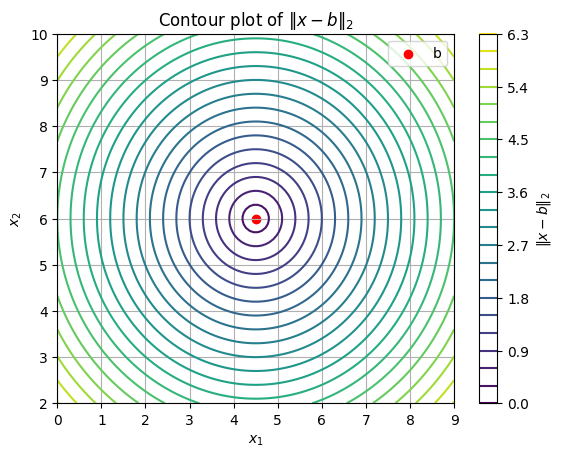

In [8]:
# Define the function
def norm_2(x, b):
    return np.linalg.norm(x - b, ord=2)

# Define the vectors x and b
b = np.array([4.5, 6])  # You can change the values as needed

# Create a meshgrid for 2D plotting
x1 = np.linspace(0, 9, 100)
x2 = np.linspace(2, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
f = np.zeros_like(X1)

# Compute the function values for each point in the meshgrid
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        f[i, j] = norm_2(x, b)

# Plot the function
plt.contour(X1, X2, f, levels=20, cmap='viridis')
plt.colorbar(label='$\|x - b\|_2$')
plt.scatter(b[0], b[1], color='red', marker='o', label='b')  # Plot point b
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contour plot of $\|x - b\|_2$')
plt.legend()
plt.grid(True)
plt.show()